<a href="https://colab.research.google.com/github/skrzypczykt/Poem/blob/master/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEVELOP MLP WITH ONE HIDDEN LAYER  USING ANY PROGRAMMING LANGUAGE FOR  PREDICTION OF THE FOLLOWING FUNCTION  
$$y = asin(bx) + d$$

In [1]:
a = 1
b = 5
d = 0.1
n_steps = 3

In [2]:
import math
import random
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
f = lambda x:a*math.sin(b*x) + d

In [3]:
#Gerenrating 120 time series
data = []
ys = []
for i in np.arange(start =0,stop = 12, step=0.1 ):
  data.append([f(i), f(i+0.1), f(i+0.2)])
  ys.append([f(i+0.3)])

data = np.array(data)
ys = np.array(ys)

In [4]:
#creating subsets 30, 50, 100 series and  20 test ones
X_train_100, X_test, y_train_100, y_test = train_test_split(data, ys, test_size=20)
random_50 = random.choices(range(100), k=50)
random_30 = random.choices(range(100), k=30)
X_train_50, y_train_50 = X_train_100[random_50], y_train_100[random_50]
X_train_30, y_train_30 = X_train_100[random_30], y_train_100[random_30]

Since we got a =1 and very small d=0.1 our values are in the range of -0.9 til 1.1 hence we decide not to perform the minimax scaling.

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

In [6]:
def create_model(dense_neurons, optimizer):
  model = tf.keras.models.Sequential([Dense(dense_neurons,input_shape=(n_steps,), activation='sigmoid'), Dense(1)])
  model.compile(optimizer=optimizer, loss='mse')
  return model

Training for 10 hidden neurons and SGD optimizer with 0.01 learning rate

In [7]:
model = create_model(10, sgd)
history = model.fit(X_train_100, y_train_100, epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4139
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.3667
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.3340
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.3390
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.2855
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.2685
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.2286
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.2080
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.1833
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.1667
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1576
Epoch 12/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1307
Epoch 13/50
4/4 [==============================] - 0s 2ms/step - loss: 0.

In [8]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$f(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10, label='true')
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro", label='predicted')
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.legend()
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, d-a, d +a])

Text(0.5, 1.0, 'The error  change depending on the epoch')

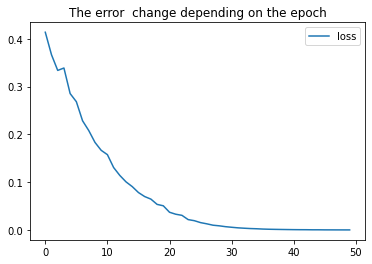

In [9]:
pd.DataFrame(history.history).plot()
plt.title("The error  change depending on the epoch")

In [10]:
y_pred_train = model.predict(X_train_100)
deviation_train = y_pred_train - y_train_100
conc = np.concatenate((y_train_100, y_pred_train, deviation_train), axis=1)
df = pd.DataFrame(conc, columns=['true','predicted','deviation'])
df

,true,predicted,deviation
0,0.536165,0.526575,-0.009589
1,-0.709019,-0.701171,0.007848
2,-0.624108,-0.614987,0.009121
3,1.028466,1.012089,-0.016376
4,0.594885,0.585931,-0.008954
...,...,...,...
95,-0.668255,-0.659791,0.008463
96,0.862558,0.855252,-0.007307
97,-0.899755,-0.895178,0.004577
98,1.034895,1.018422,-0.016473


In [11]:
y_pred = model.predict(X_test)

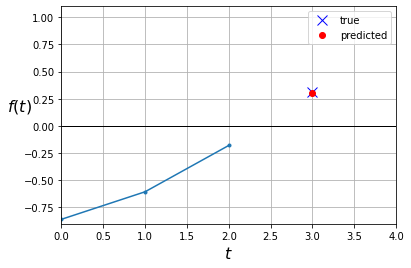

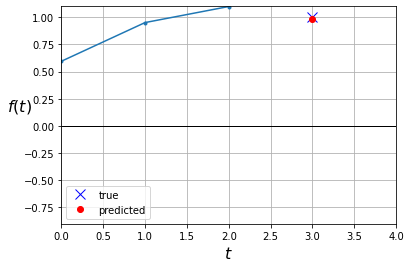

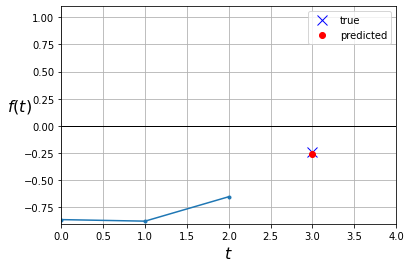

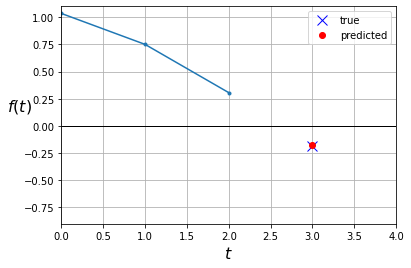

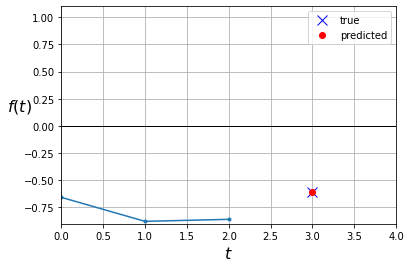

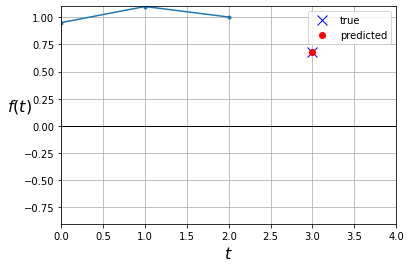

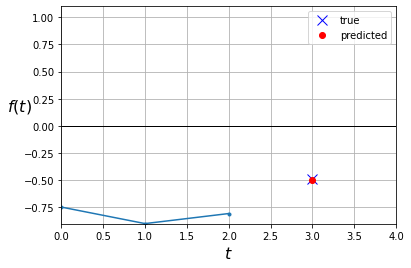

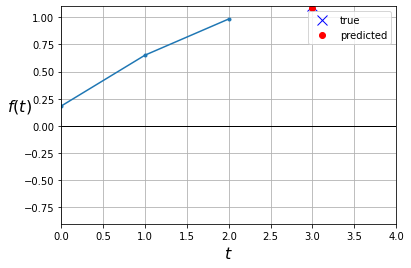

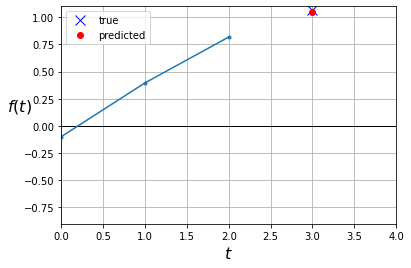

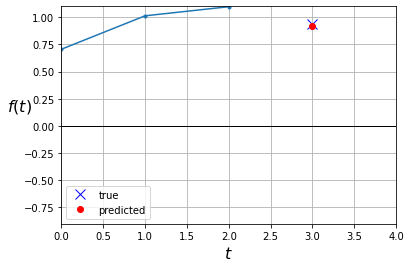

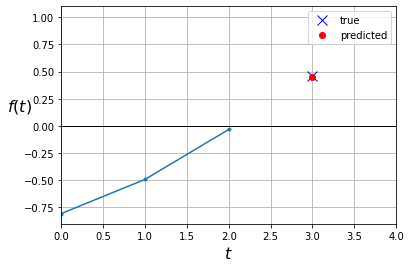

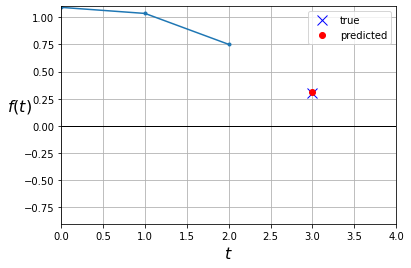

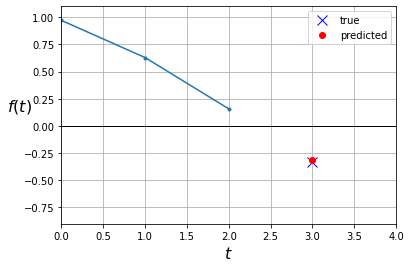

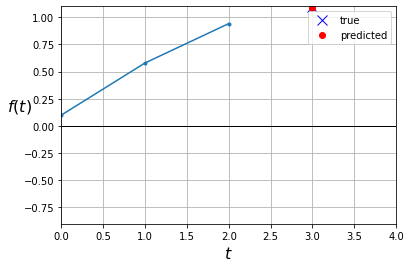

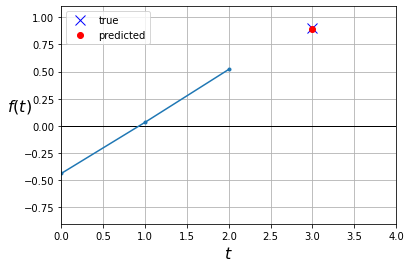

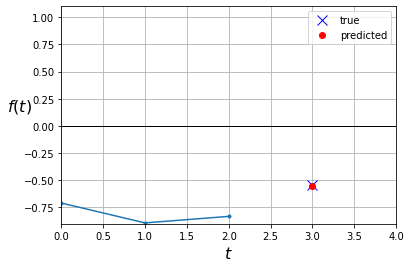

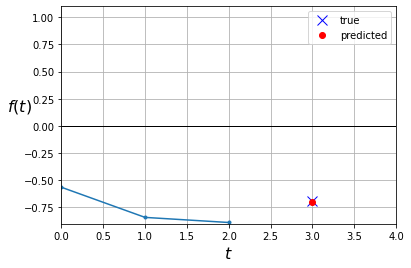

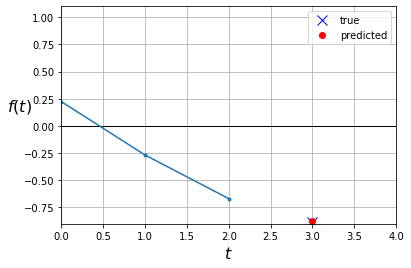

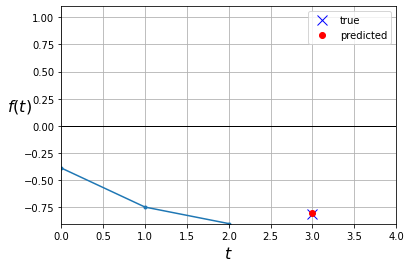

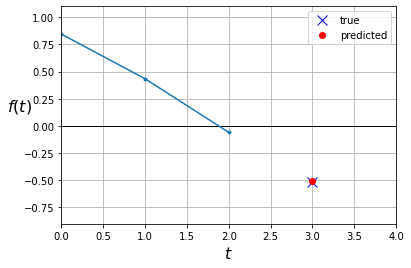

In [12]:
#plotting some results
for i in range(20):
  plot_series(X_test[i, :], y_test[i], y_pred[i])
  plt.show()

In [13]:
deviation = y_pred - y_test
conc = np.concatenate((y_test, y_pred, deviation), axis=1)
df = pd.DataFrame(conc, columns=['true','predicted','deviation'])
df

,true,predicted,deviation
0,0.315120,0.303285,-0.011835
1,1.001788,0.985933,-0.015856
2,-0.242481,-0.254043,-0.011562
3,-0.187903,-0.175193,0.012710
4,-0.605540,-0.610297,-0.004757
5,0.684197,0.679008,-0.005188
6,-0.491358,-0.498828,-0.007471
7,1.099912,1.084827,-0.015085
8,1.063795,1.052609,-0.011187
9,0.936656,0.922574,-0.014081


Hidden neurons number

In [14]:
results = {}
for hidden_neurons in [3,5,10,20,50]:

  model = create_model(hidden_neurons, sgd)
  history = model.fit(X_train_100, y_train_100, epochs=50, verbose=0)
  results[hidden_neurons] = model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 71ms/step - loss: 0.0121


In [15]:
#Mean Squared Error depending on the hidden neurons number
results

{3: 0.013570750132203102,
 5: 0.00029413821175694466,
 10: 6.850394129287452e-05,
 20: 6.518084410345182e-05,
 50: 0.012079666368663311}

In [16]:
results_train_size = {}
for (X,y), num in zip([[X_train_100, y_train_100],[X_train_50, y_train_50],[X_train_30, y_train_30]], [100, 50, 30]):

  model = create_model(20, sgd)
  history = model.fit(X, y, epochs=50, verbose=0)
  results_train_size[num] = model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 63ms/step - loss: 0.1405


In [17]:
results_train_size

{30: 0.14053459465503693, 50: 0.014522072859108448, 100: 8.426742715528235e-05}

The same for adaptive learning rate

In [18]:
results_train_size = {}
for (X,y), num in zip([[X_train_100, y_train_100],[X_train_50, y_train_50],[X_train_30, y_train_30]], [100, 50, 30]):

  model = create_model(20, adam)
  history = model.fit(X, y, epochs=50, verbose=0)
  results_train_size[num] = model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 63ms/step - loss: 0.0024


In [19]:
results_train_size

{30: 0.002445689868181944,
 50: 0.00011623198224697262,
 100: 6.074084012652747e-05}